In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import pyttsx3
import speech_recognition as sr

In [3]:
df=pd.read_csv("Corpus_to_test.csv",encoding='latin-1')
df.tail()

,S.No,Question,Category,Answers
635,636,I am fine,Greetings,Your welcome!
636,637,fine,Greetings,Your welcome!
637,638,thanks,Greetings,Your welcome!
638,639,thank you,Greetings,Your welcome!
639,640,could not understand audio,Greetings,I didnt hear you!!!


In [4]:
df['Category'].unique()

array(['Admission', 'Hostel', 'Finance', 'About REVA', 'ERP Support',
       'Academics', 'Examination', 'HR', 'UG Courses', 'PG Courses',
       'Certificate/Diploma/PG Diploma', 'Ph.D.', 'RACE', 'Greetings'],
      dtype=object)

In [5]:
questions=df['Question'].values.tolist()
questions

['I am unable to connect to admission department.',
 'What are the UG courses offered?',
 'What are the Computer Applications courses offered in UG?',
 'What are the Arts and Humanity courses offered in UG',
 'What are the Law courses offered in UG',
 'What are the Architecture courses offered in UG',
 'What are the Certification program offered in UG',
 'What are the Management (BBA) courses offered in UG',
 'What are the PG courses offered?',
 'What are the Mtech courses offered?',
 'What are the MA courses offered?',
 'What are the MSc courses offered?',
 'What are the MPlan courses offered?',
 'What are the MCom courses offered?',
 'What are the MPA courses offered?',
 'What are the MCA courses offered?',
 'What are the LLM courses offered?',
 'What are the MBA courses offered?',
 'What are the PhD courses offered?',
 'What are the part time courses offered?',
 'What are the fees to be paid for a course?',
 'Information about university and number of courses offered.',
 'Admission 

In [6]:
labels=df['S.No'].values.tolist()


In [7]:
answers=df['Answers'].values.tolist()
answers

['You can write to admissions@reva.edu.in. One of our admission counsellor will contact you at your registered mobile number',
 'Computer Applications, Arts and Humanity,  Law, Architecture,  Management, Certification program',
 'Bachelor of Computer Applications (BCA)',
 '1.\tBA in Political Science, Economics and Journalism\n2.\tBA in Journalism, English and Psychology\n3.\tBA in Tourism, Journalism and History\n4.\tBA in Journalism and Mass Communication\n5.\tBA in Performing Arts, English, and Psychology',
 '1.\tBachelor of Arts and Bachelor of Laws (B.A., LL. B. Honours)\n2. \tBachelor of Business Administration and Bachelor of Law (BBA., LL. B. Honours)',
 'Bachelor of Architecture (B. Arch.)',
 'Advanced Certification program in Plumbing and Irrigation Systems in Civil Engineering',
 '\tBachelor of Business Administration and Bachelor of Business Administration (Entrepreneurship)',
 'MTech, MA, MSc, MPlan, MCom, MPA, MCA, LLM, MBA',
 '\tM. Tech in Computer Aided Structural Engin

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 4 columns):
S.No        640 non-null int64
Question    640 non-null object
Category    640 non-null object
Answers     640 non-null object
dtypes: int64(1), object(3)
memory usage: 20.1+ KB


In [9]:
df.isnull().sum()

S.No        0
Question    0
Category    0
Answers     0
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Category', data=df)

In [10]:
#sns.countplot(x='Category',hue ='Sub-category', data=df)

In [11]:
##### List of Questions to list of words for better visualization
word_list=[]
list_question=list(df["Question"])
for sentence in list_question:
    words_sentence=sentence.split()
    for words in words_sentence:
        word_list.append(words)


word_list=[word for sentence in list(df["Question"]) for word in sentence.split()]
print(word_list)

['I', 'am', 'unable', 'to', 'connect', 'to', 'admission', 'department.', 'What', 'are', 'the', 'UG', 'courses', 'offered?', 'What', 'are', 'the', 'Computer', 'Applications', 'courses', 'offered', 'in', 'UG?', 'What', 'are', 'the', 'Arts', 'and', 'Humanity', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Law', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Architecture', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Certification', 'program', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Management', '(BBA)', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'PG', 'courses', 'offered?', 'What', 'are', 'the', 'Mtech', 'courses', 'offered?', 'What', 'are', 'the', 'MA', 'courses', 'offered?', 'What', 'are', 'the', 'MSc', 'courses', 'offered?', 'What', 'are', 'the', 'MPlan', 'courses', 'offered?', 'What', 'are', 'the', 'MCom', 'courses', 'offered?', 'What', 'are', 'the', 'MPA', 'courses', 'offered?', 'What', 'are', 'the', 'MCA', 'courses', 'offered?', 'W

In [12]:
from collections import Counter
#####  frequency of each word and the most common words in the dataset
frequency=Counter(word_list)
print (frequency)
print (frequency.most_common(5))

Counter({'the': 246, 'you': 166, 'Do': 162, 'What': 141, 'offer': 123, 'is': 116, 'for': 109, 'I': 105, 'in': 96, 'to': 91, 'How': 71, 'are': 70, 'IN': 66, 'of': 62, 'REVA': 62, 'a': 55, 'Is': 52, 'have': 49, 'AND': 40, '-': 40, 'and': 39, 'do': 39, 'my': 36, 'any': 36, 'can': 33, 'there': 27, 'University?': 26, 'courses': 23, 'Can': 22, 'get': 20, 'program?': 20, 'if': 20, 'at': 19, 'University': 19, 'campus?': 19, 'When': 19, 'many': 19, 'Does': 18, 'not': 17, 'ENGINEERING?': 17, 'pay': 16, 'program': 15, 'be': 15, 'apply': 15, 'programs?': 15, 'PH.D': 15, 'offered?': 14, 'offered': 14, 'from': 14, 'application': 14, 'or': 14, 'B.TECH.': 14, 'COMPUTER': 14, 'programs': 13, 'it': 13, 'student': 13, 'fees': 12, 'Are': 12, 'hostel': 12, 'HONS': 12, 'B.SC.': 12, 'M.TECH.': 12, 'DIPLOMA': 12, 'students': 11, 'on': 11, 'REVA?': 11, 'will': 11, 'admission?': 11, 'we': 11, 'Why': 11, 'M.': 11, 'am': 10, 'university': 10, 'book': 10, 'ERP': 10, 'how': 9, 'Whom': 9, 'M.SC.': 9, 'admission': 8,

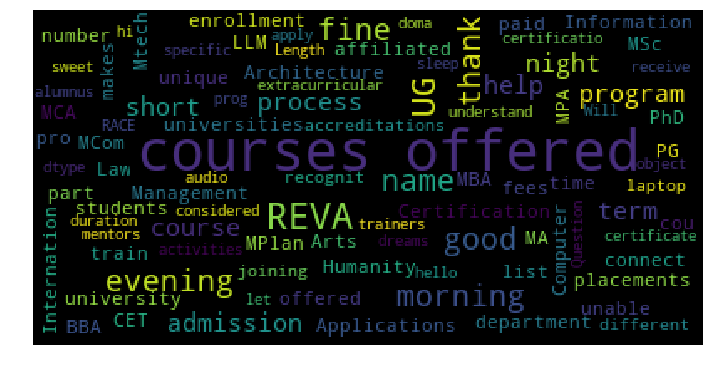

In [12]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['Question'])

In [13]:
bow_vectorizer = CountVectorizer()

In [14]:
training_vectors = bow_vectorizer.fit_transform(questions)
classifier = MultinomialNB()
classifier.fit(training_vectors, labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
import joblib

In [18]:
joblib.dump(bow_vectorizer,"bow_vectorizer.joblib")
joblib.dump(classifier,"model_MNB.joblib")

['model_MNB.joblib']

In [30]:
class ChatBot:
    exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
    def start_chat(self):
        engine = pyttsx3.init()
        engine.say("Hi, I'm a bot,How can i help you")
        engine.runAndWait()
        r = sr.Recognizer()
        with sr.Microphone() as source:
            print("user response recording started...")
            audio = r.listen(source,phrase_time_limit=10)
            print("finished recording")
            try:
                user_response = r.recognize_google(audio)
                print("user: ",user_response)
            except:
                print("could not understand audio")
                user_response="hello"
        #user_response = input("Hi, I'm a bot,How can i help you?\n")
        self.chat(user_response)
  
    def chat(self, reply):
        while not self.make_exit(reply):
            qns=self.generate_response(reply)
            print(qns)
            engine = pyttsx3.init()
            engine.say(str(qns))
            engine.runAndWait()
            r = sr.Recognizer()
            with sr.Microphone() as source:
                print("user response recording started...")
                audio = r.listen(source,phrase_time_limit=10)
                print("finished recording hh")
            try:
                reply = r.recognize_google(audio)
                print("user: ",reply)
            except:
                print("could not understand audio")
                user_response=""
            print(qns+"\n")
            #reply = input(qns+"\n")
        return
  
    def generate_response(self, ans):
        input_vector = bow_vectorizer.transform([ans])
        predict = classifier.predict(input_vector)
        index = int(predict[0])
        #print("Accurate:",str(classifier.predict_proba(input_vector)[0][index-1] * 1000)[:5] + "%")
        return answers[index-1]
        print()
    def make_exit(self, reply):
        for exit_command in self.exit_commands:
            if exit_command in reply:
                engine = pyttsx3.init()
                engine.say("Ok, have a great day!")
                engine.runAndWait()
                print("Ok, have a great day!")
                return True
        return False

In [31]:
etcetera = ChatBot()
etcetera.start_chat()

user response recording started...
finished recording
could not understand audio
Good, tell me..
user response recording started...
finished recording hh
could not understand audio
Good, tell me..

Good, tell me..
user response recording started...
finished recording hh
user:  hello
Good, tell me..

Good, tell me..
user response recording started...
finished recording hh
user:  admission
Good, tell me..

You may apply to our programs throughout the year. For the masters and long term programs, we have three admission cycles or batches per year; August, November and March.   
user response recording started...
finished recording hh
could not understand audio
You may apply to our programs throughout the year. For the masters and long term programs, we have three admission cycles or batches per year; August, November and March.   

You may apply to our programs throughout the year. For the masters and long term programs, we have three admission cycles or batches per year; August, November

KeyboardInterrupt: 

In [ ]:
#Logistic Regression
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
classifier.fit(training_vectors, labels)

In [ ]:
etcetera = ChatBot()
etcetera.start_chat()

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(training_vectors, labels)

In [ ]:
etcetera = ChatBot()
etcetera.start_chat()

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(training_vectors, labels)

In [ ]:
etcetera = ChatBot()
etcetera.start_chat()

In [ ]:
#SVM
from sklearn.svm import SVC  
classifier = SVC(kernel='linear',probability=True) 
  
# fitting x samples and y classes 
classifier.fit(training_vectors, labels) 

In [ ]:
etcetera = ChatBot()
etcetera.start_chat()

In [ ]:
import speech_recognition
 
# The Recognizer is initialized.
UserVoiceRecognizer = speech_recognition.Recognizer()
 
while(1):
    try:
 
        with speech_recognition.Microphone() as UserVoiceInputSource:
 
            UserVoiceRecognizer.adjust_for_ambient_noise(UserVoiceInputSource, duration=0.5)
 
            # The Program listens to the user voice input.
            UserVoiceInput = UserVoiceRecognizer.listen(UserVoiceInputSource)
 
            UserVoiceInput_converted_to_Text = UserVoiceRecognizer.recognize_google(UserVoiceInput)
            UserVoiceInput_converted_to_Text = UserVoiceInput_converted_to_Text.lower()
            print(UserVoiceInput_converted_to_Text)
    
    except KeyboardInterrupt:
        print('A KeyboardInterrupt encountered; Terminating the Program !!!')
        exit(0)
    
    except speech_recognition.UnknownValueError:
        print("No User Voice detected OR unintelligible noises detected OR the recognized audio cannot be matched to text !!!")

    

In [20]:
import speech_recognition as sr
r = sr.Recognizer()
with sr.Microphone() as source:
    print("recording started...")
    audio = r.listen(source,phrase_time_limit=10)
    print("finished recording")

recording started...
finished recording


In [21]:
try:
    print("You said " + r.recognize_google(audio))  
except LookupError:                          
    print("Could not understand audio")

You said hello hello hello hello
